In [7]:
# Set up
%pylab inline
%run params.py
import seaborn as sns


# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

# Import libraries
import os
import pandas as pd
import scipy.stats
import seaborn as sns

############ Set up paths #############
SAVEPLOT = True
PREFIX = "eSTR-GWAS"
FIGPREFIX = "Figure4"
DATADIR = os.path.join(BASEDATADIR, PREFIX)
RESULTSDIR = os.path.join(BASERESULTSDIR, PREFIX)

############ Load data #############
examples = []

slc_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/baso_p_gran_N170223_ENSG00000123643.8_Skin-SunExposed_combined.txt"
slc_str_pos = 150848654
slc_str_pval = 1.0493718491097452e-16
examples.append(["BASOP-SLC", slc_pvals_file, slc_str_pos, slc_str_pval])

tufm_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/rbc_tmp_ENSG00000178952.4_WholeBlood_combined.txt"
tufm_str_pos = 28871190
tufm_str_pval = 2.632897624030763e-17
examples.append(["RBC-TUFM",tufm_pvals_file, tufm_str_pos, tufm_str_pval])

vldlr_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/hgb_N172925_ENSG00000147852.11_WholeBlood_combined.txt"
vldlr_str_pos = 2622147
vldlr_str_pval = 8.626591585226099e-14
examples.append(["HGB-VLDLR",vldlr_pvals_file, vldlr_str_pos, vldlr_str_pval])

med19_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/scz_pgc_ENSG00000156603.10_Adipose-Subcutaneous_combined.txt"
med19_str_pos = 57523883
med19_str_pval = 1.2963494023108917e-12
examples.append(["SCZ-MED19",med19_pvals_file, med19_str_pos, med19_str_pval])

rft1_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/height_ENSG00000163933.5_Artery-Aorta_combined.txt"
rft1_str_pos = 53128363
rft1_str_pval = 5.169004081157927e-20
examples.append(["Height-RFT1", rft1_pvals_file, rft1_str_pos, rft1_str_pval])

galnt2_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/scz_pgc_ENSG00000143641.8_Artery-Aorta_combined.txt"
galnt2_str_pos = 230264005
galnt2_str_pval = 2.248764404534748e-05
examples.append(["SCZ-GALNT2",galnt2_pvals_file, galnt2_str_pos, galnt2_str_pval])

prr12_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/scz_pgc_ENSG00000126464.9_Thyroid_combined.txt"
prr12_str_pos = 50110619
prr12_str_pval = 3.493237190532509e-15
examples.append(["SCZ-PRR12",prr12_pvals_file, prr12_str_pos, prr12_str_pval])

prr12_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/rbc_N172952_ENSG00000126464.9_Thyroid_combined.txt"
prr12_str_pos = 50110619
prr12_str_pval = 3.493237190532509e-15
examples.append(["RBC-PRR12",prr12_pvals_file, prr12_str_pos, prr12_str_pval])

dync_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/scz_pgc_ENSG00000077380.11_Cells-Transformedfibroblasts_combined.txt"
dync_str_pos = 172569135
dync_str_pval = 4.728571087784242e-10
examples.append(["SCZ-DYNC",dync_pvals_file, dync_str_pos, dync_str_pval])

plcd4_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/height_ENSG00000115556.9_Muscle-Skeletal_combined.txt"
plcd4_str_pos = 219482301
plcd4_str_pval = 0.00012185985999398356
examples.append(["Height-PLCD4",plcd4_pvals_file, plcd4_str_pos, plcd4_str_pval])


man2a1_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/scz_pgc_ENSG00000112893.5_WholeBlood_combined.txt"
man2a1_str_pos = 109038017
man2a1_str_pval = 2.3903926611045725e-06
examples.append(["SCZ-MAN2A1",man2a1_pvals_file, man2a1_str_pos, man2a1_str_pval])

# TODO why is this one not transformed fibroblasts?
TM6SF2_pvals_file = "/storage/mgymrek/gtex/gwas/summarystats/coloc/tmp/scz_pgc_ENSG00000213996.8_Adipose-Visceral_combined.txt"
TM6SF2_str_pos = 19424949
TM6SF2_str_pval = 5.208529684822029e-05
examples.append(["SCZ-TM6SF2",TM6SF2_pvals_file, TM6SF2_str_pos, TM6SF2_str_pval])


Populating the interactive namespace from numpy and matplotlib


In [3]:
def LogP(p):
    return -1*np.log10(p)

def PlotColoc(pvalfile, strpos, strpval, label=None, fname=None):
    pvals = pd.read_csv(pvalfile, sep=" ")
    coloc = pd.read_csv(pvalfile+".coloc.txt")
    coloc["order"] = coloc["results.snp"].apply(lambda x: int(x.split(".")[1]))
    coloc = coloc.sort_values("order")
    pvals["coloc.p"] = list(coloc["results.SNP.PP.H4"])

    
    fig = plt.figure()
    fig.set_size_inches((7, 6))

    ax = fig.add_subplot(311)
    ax.scatter(pvals["snppos"], pvals["gtex.p"].apply(LogP), color="black", s=5)
    ax.scatter([strpos], [LogP(strpval)], color="red", marker="*", s=30)
    ax.set_ylabel("Expression -log10 P", size=15)
    ax.set_xticks([])
    ax.set_title(label)

    ax = fig.add_subplot(312)
    ax.scatter(pvals["snppos"], pvals["gwas.p"].apply(LogP), color="black", s=5)
    print("%s:%s"%(label, min(pvals["gwas.p"])))
    ax.axhline(y=LogP(5*10**-8), linestyle="dashed", color="gray")
    ax.set_ylabel("GWAS -log10 P", size=15)
    #ax.set_ylim(bottom=0, top=10)

    try:
        ldvals = pd.read_csv(pvalfile.replace("combined", "LD"), sep="\t")
        ax = fig.add_subplot(313)
        ax.scatter(ldvals["snppos"], ldvals["ld"], color="black", s=5)
        ax.set_ylabel("LD", size=15)
    except: pass
    fig.tight_layout()
    if fname is not None:
        print(fname)
        print(min(pvals["snppos"]))
        print(max(pvals["snppos"]))
        fig.savefig(fname)

BASOP-SLC:4.41e-09
/storage/mgymrek/gtex-estrs-paper/results/eSTR-GWAS/Figure4_BASOP-SLC_GWAS.pdf
150717977
150971848
RBC-TUFM:1.6069999999999997e-10
/storage/mgymrek/gtex-estrs-paper/results/eSTR-GWAS/Figure4_RBC-TUFM_GWAS.pdf
28823040
28957172
HGB-VLDLR:1.5229999999999998e-09
/storage/mgymrek/gtex-estrs-paper/results/eSTR-GWAS/Figure4_HGB-VLDLR_GWAS.pdf
2521976
2759058
SCZ-MED19:6.652e-08
/storage/mgymrek/gtex-estrs-paper/results/eSTR-GWAS/Figure4_SCZ-MED19_GWAS.pdf
57371192
57578412
Height-RFT1:1.4999999999999996e-97
/storage/mgymrek/gtex-estrs-paper/results/eSTR-GWAS/Figure4_Height-RFT1_GWAS.pdf
53024580
53264124
SCZ-GALNT2:1.763e-06
/storage/mgymrek/gtex-estrs-paper/results/eSTR-GWAS/Figure4_SCZ-GALNT2_GWAS.pdf
230093553
230515239
SCZ-PRR12:7.145999999999999e-07
/storage/mgymrek/gtex-estrs-paper/results/eSTR-GWAS/Figure4_SCZ-PRR12_GWAS.pdf
49995893
50229483
RBC-PRR12:7.13e-12
/storage/mgymrek/gtex-estrs-paper/results/eSTR-GWAS/Figure4_RBC-PRR12_GWAS.pdf
49995893
50229644
SCZ-DYNC:

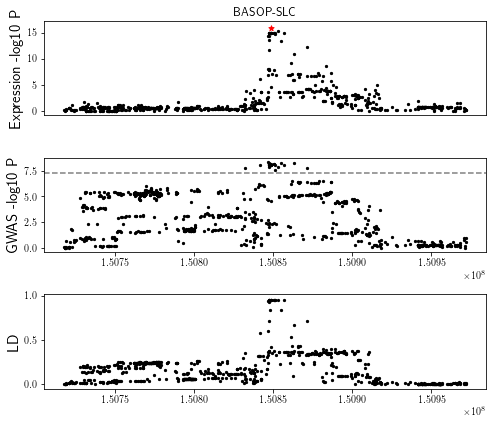

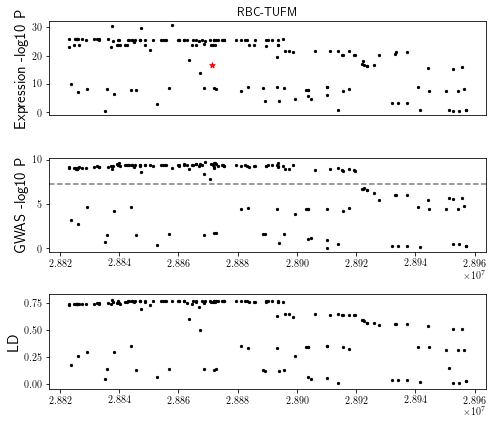

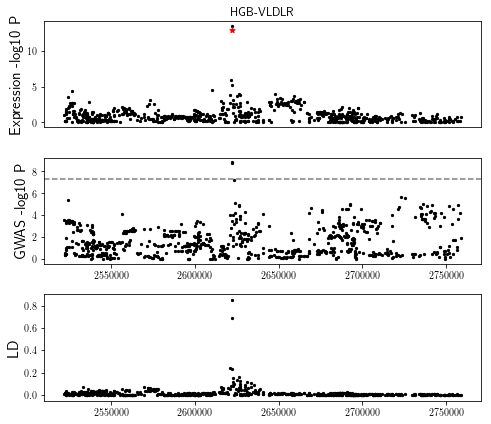

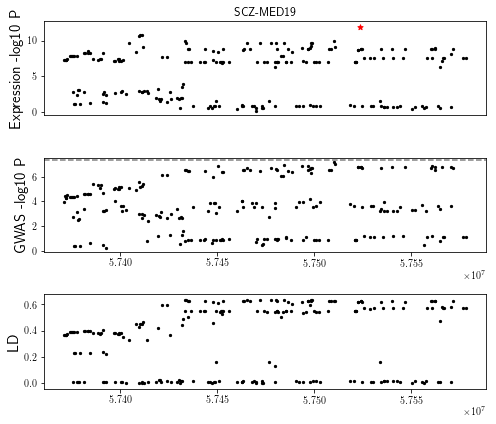

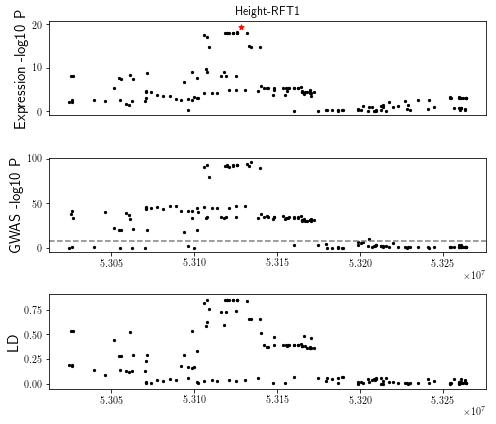

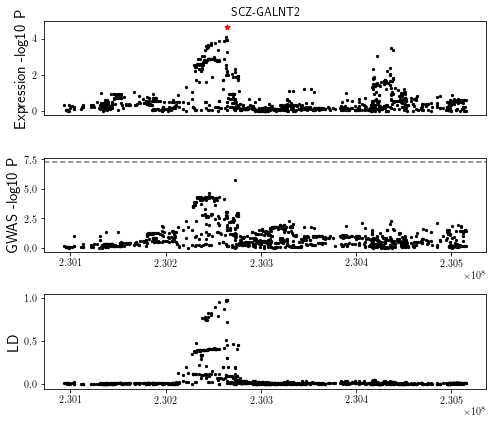

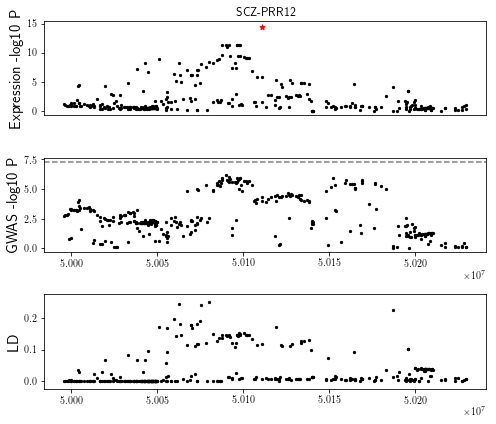

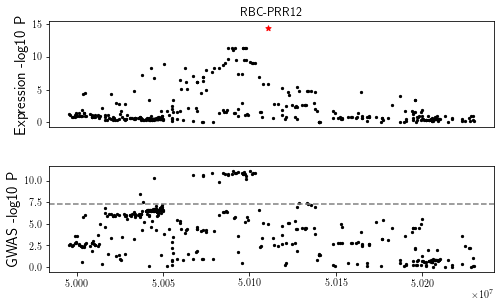

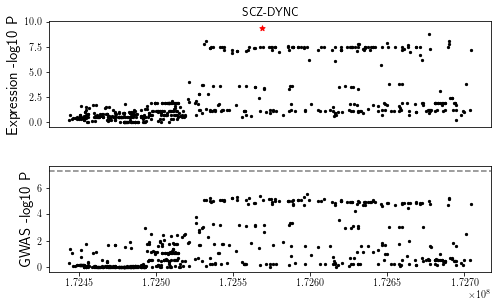

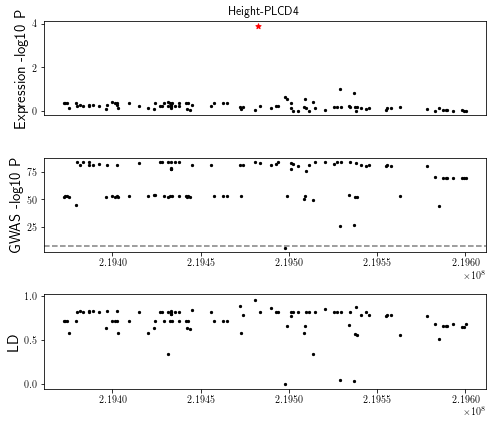

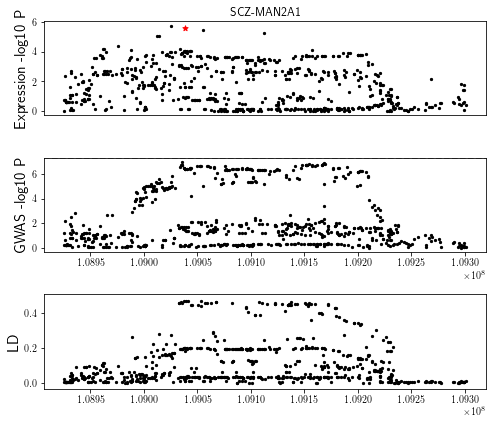

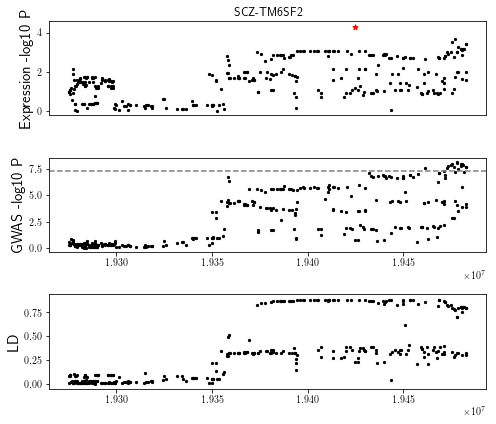

In [8]:
for ex in examples:
    label, pvalfile, strpos, strpval = ex
    fname = os.path.join(RESULTSDIR, "%s_%s_GWAS.pdf"%(FIGPREFIX, label))
    PlotColoc(pvalfile, strpos, strpval, label=label, fname=fname)

H0: neither trait has a genetic association in the region
H1: only trait 1 has a genetic association in the region
H2: only trait 2 has a genetic association in the region
H3: both traits are associated, but with different causal variants
H4: both traits are associated and share a single causal variant

In [38]:
x.tail()

,chrom,gene,rsid,str.start,tissue,score,ld,p0,p1,p2,p3,p4
58,5,MAN2A1,rs4388249,109038017,WholeBlood,0.103023,0.196410,4.390000e-05,0.000252,3.810000e-02,0.21800,0.744
97,19,TM6SF2,rs2905424,19438111,Adipose-Visceral,0.171331,0.876567,9.000000e-05,0.000034,1.650000e-01,0.06200,0.773
24,2,CEBPZ,rs2372993,37551759,Lung,0.421109,0.906723,3.400000e-03,0.047800,5.470000e-03,0.07600,0.867
61,11,MED19,rs9420,57522177,Adipose-Subcutaneous,0.472644,0.678602,3.690000e-10,0.000146,2.500000e-07,0.09840,0.901
44,1,GALNT2,rs11807834,230267823,Artery-Aorta,0.144383,0.464558,2.670000e-05,0.001770,9.700000e-05,0.00542,0.993


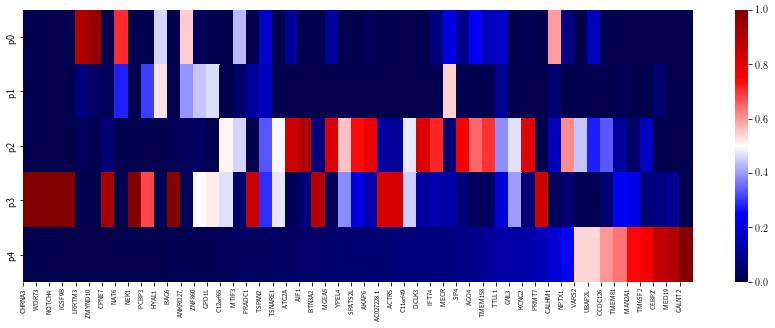

In [37]:
# Plot coloc probs for each trait
#data = pd.read_csv("/storage/mgymrek/gtex/gwas/summarystats/coloc/height_coloc_summary.tab", sep="\t")
data = pd.read_csv("/storage/mgymrek/gtex/gwas/summarystats/coloc/scz_pgc_coloc_summary.tab", sep="\t")
#data = pd.read_csv("/storage/mgymrek/gtex/gwas/summarystats/coloc/hgb_coloc_summary.tab", sep="\t")

x = data[(data["ld"]>=0.1) ]

x = x.sort_values("p4")

grid=x[["p0","p1","p2","p3","p4"]].copy()
grid.index = list(x["gene"])
grid = grid.transpose()
fig = plt.figure()
fig.set_size_inches((15, 5))
ax = fig.add_subplot(111)
sns.heatmap(grid, ax=ax, cmap=plt.cm.seismic)
ax.set_xticks(range(x.shape[0]))
ax.set_xticklabels(list(x["gene"]), rotation=90, size=6);

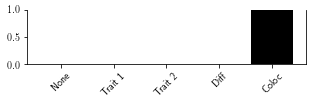

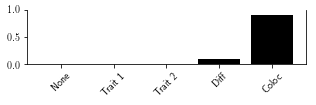

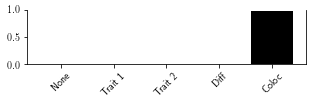

In [4]:
# For the two examples, plot coloc probs
def PlotProbs(probs, label):
    hyps = ["None", "Trait 1", "Trait 2", "Diff", "Coloc"]
    fig = plt.figure()
    fig.set_size_inches((5, 1))
    ax = fig.add_subplot(111)
    ax.bar(range(len(probs)), probs, color="black")
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(range(len(probs)))
    ax.set_xticklabels(hyps, rotation=45);
    ax.set_ylim(bottom=0, top=1)
    ax.set_yticks([0,0.5, 1])
    fig.savefig(os.path.join(RESULTSDIR, "%s_colocprobs_%s.pdf"%(FIGPREFIX, label)))
    
    
probs = [5.21e-14,  5.60e-06,  1.99e-11,  1.14e-03,  9.99e-01]
PlotProbs(probs, "VLDLR")

probs = [3.69e-10,  1.46e-04,  2.50e-07,  9.84e-02,  9.01e-01 ]
PlotProbs(probs, "MED19")

probs = [6.35e-109,  4.83e-94,  1.39e-17,  9.61e-03,  9.90e-01 ]
PlotProbs(probs, "RFT1")
